## 4-2. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [4]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.

import time

frequency= {}

import requests
from bs4 import BeautifulSoup

for i in range(1,11):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i),user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    # 1. ul 태그 모두 찾기
    # 2. 1번 안에 있는 li 태그의 text 추출

    ul_tags = soup.find_all("ul", "question-tags")
    for ul in ul_tags:
        li_tags = ul.find_all("li")
        for li in li_tags:
            tag = li.text.strip()
            if tag not in frequency:
                frequency[tag] = 1
            else:
                frequency[tag] += 1
    time.sleep(0.5)

print(frequency)

{'kotlin': 7, 'android-studio': 9, 'python': 241, 'game': 1, 'polynomial': 1, 'pandas': 18, 'selenium': 12, 'crawling': 6, 'xcode': 1, 'c++': 23, 'html': 7, 'html5': 1, 'class': 4, 'network': 1, 'port': 1, 'java': 34, 'name': 1, 'error': 9, 'function': 7, 'c': 43, 'fortran': 1, 'visual-studio': 3, 'regexp': 1, 'service': 1, 'gps': 1, 'android': 12, 'loops': 5, 'intellij-idea': 1, 'scala': 1, 'opencv': 5, 'python-3.x': 1, 'python3': 4, 'continue': 1, 'def': 3, 'javascript': 6, 'this': 1, 'selenium-webdrive': 3, 'list': 15, 'ubuntu': 3, 'git': 1, 'react': 4, 'mac': 1, 'vscode': 3, 'github': 6, 'keyboard-shortcut': 1, 'dataframe': 8, 'typescript': 3, 'npm': 1, 'random': 2, 'ios': 1, 'webview': 2, 'webapp': 1, 'while-loop': 7, 'beautifulsoup': 1, 'mysql': 3, 'ruby-on-rails': 2, 'float': 1, 'code': 1, 'django': 5, 'parameter': 1, 'return': 1, 'tuple': 3, 'programming': 3, 'py': 1, 'conditional-statement': 2, 'vue': 1, 'node.js': 7, 'axios': 1, 'get': 1, 'session': 1, 'psycopg2': 1, 'table':

In [ ]:
# 응답을 바탕으로 BeautifulSoup 객체를 생성해봅시다.



In [ ]:
# 질문의 빈도를 체크하는 dict를 만든 후, 빈도를 체크해봅시다.



In [6]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.

from collections import Counter

counter = Counter(frequency)

counter.most_common(10)

[('python', 241),
 ('c', 43),
 ('java', 34),
 ('c++', 23),
 ('pandas', 18),
 ('list', 15),
 ('selenium', 12),
 ('android', 12),
 ('for', 10),
 ('android-studio', 9)]

<AxesSubplot: >

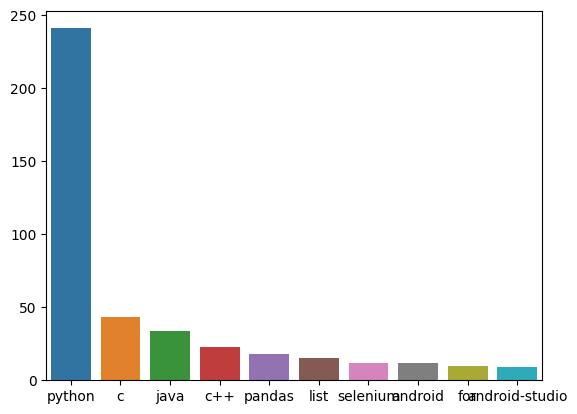

In [7]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.

import seaborn as sns

x = [elem[0] for elem in counter.most_common(10)]
y = [elem[1] for elem in counter.most_common(10)]

sns.barplot(x=x, y=y)

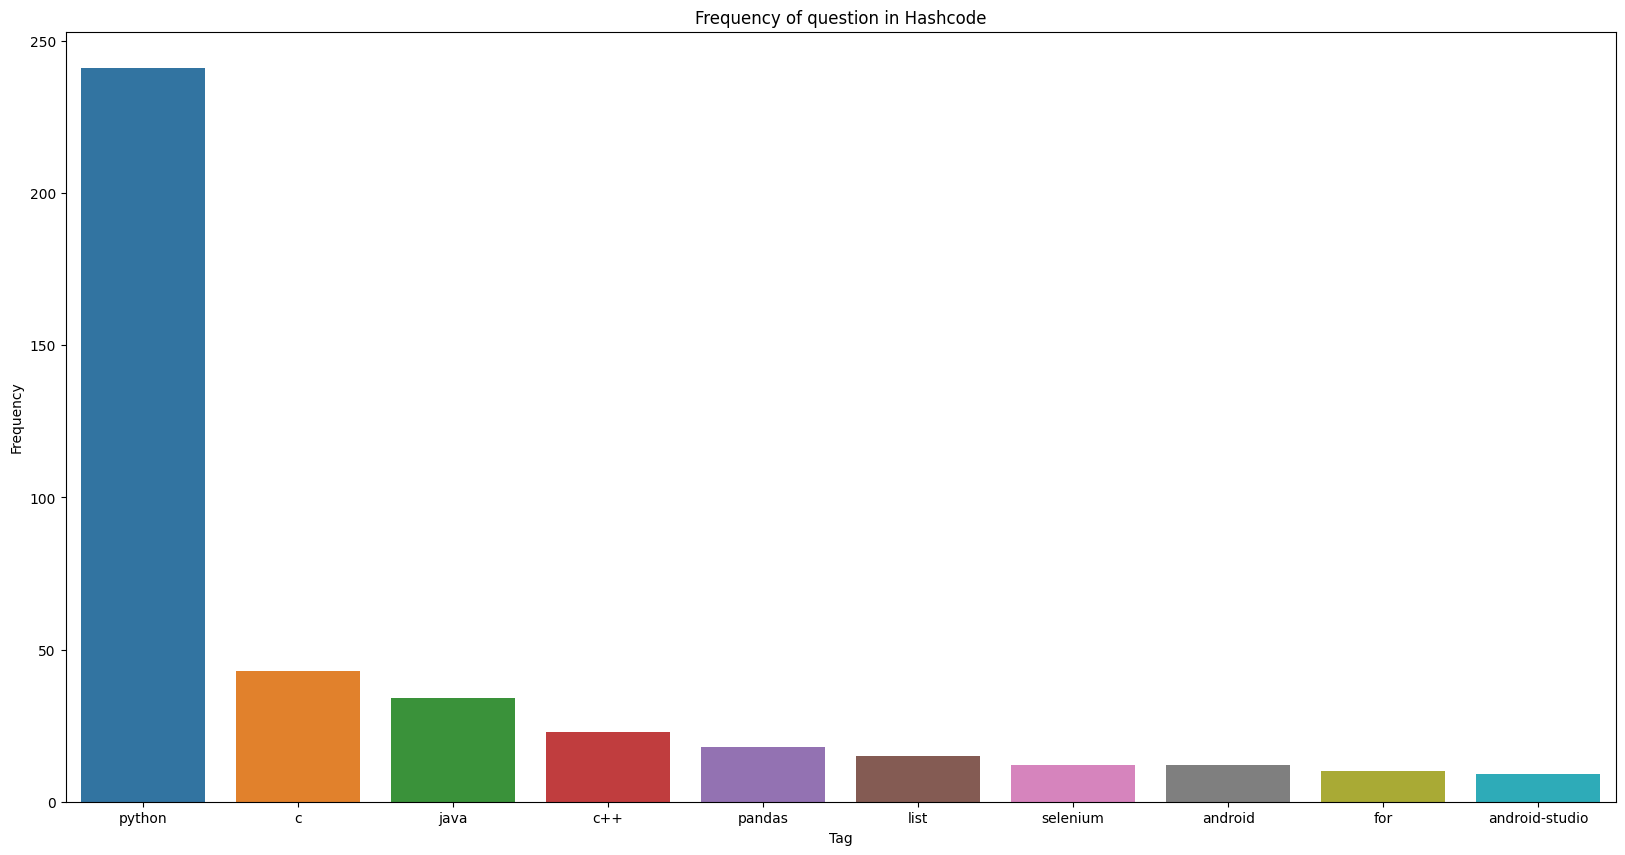

In [8]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title("Frequency of question in Hashcode")
plt.xlabel("Tag")
plt.ylabel("Frequency")

sns.barplot(x=x, y=y)

plt.show()